In [1]:
#library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score, make_scorer

In [2]:
df = pd.read_csv("hotel_bookings.csv")

# Data Cleaning

In [3]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [4]:
#use only the data that belongs to city hotels
df=df.loc[df['hotel']=='City Hotel']

In [5]:
#dealing with null values
df.isnull().sum().sort_values(ascending=False)[:5]

company               75641
agent                  8131
country                  24
children                  4
reserved_room_type        0
dtype: int64

In [6]:
df.isnull().sum()*100/df.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.005042
babies                             0.000000
meal                               0.000000
country                            0.030253
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [7]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [8]:
#drop the column company as 94% of it has missing values
df.drop(columns=['company'],inplace=True)

In [9]:
# convert the agent column into a categorical variable 
# by changing those with agent id to "Agent" and those without as "No Agent"
df.loc[df.agent.isnull()==False,'agent']='Agent'
df.agent.fillna('No Agent',inplace=True)

In [10]:
#label those without countries as "Unknown"
df.country.fillna('Unknown',inplace=True)

In [11]:
#drop rows thats are missing children
df.dropna(subset=["children"],inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.00000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000,53424.000000
mean,0.300333,77.684112,2016.254062,26.637186,15.755859,0.872174,2.274446,1.87631,0.131851,0.007338,0.031971,0.035770,0.191506,0.246387,1.020309,110.992036,0.035621,0.710954
std,0.458407,82.113909,0.659228,13.586701,8.801478,0.913762,1.618617,0.54429,0.442176,0.102669,0.175924,0.372798,2.038874,0.704087,11.902145,48.058585,0.186251,0.833549
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.300000,0.000000,1.000000
75%,1.000000,118.000000,2017.000000,37.000000,23.000000,2.000000,3.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.00000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


# Feature Engineering & Transformation

In [14]:
#Feature Engineering
df['total_members'] = df['adults'] + df['children'] + df['babies']
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['revenue'] = df['total_stay'] * df['adr']

In [15]:
#Binning of Countries
df.country.unique()

array(['PRT', 'ITA', 'ESP', 'DEU', 'FRA', 'NLD', 'GBR', 'ROU', 'BRA',
       'SWE', 'AUT', 'AGO', 'BEL', 'CHE', 'NOR', 'RUS', 'ISR', 'IRL',
       'POL', 'CHN', 'USA', 'MAR', 'AUS', 'MOZ', 'TUN', 'DNK', 'MEX',
       'GRC', 'DZA', 'COL', 'LUX', 'CN', 'LVA', 'FIN', 'HRV', 'STP',
       'BGR', 'UKR', 'VEN', 'TWN', 'IRN', 'KOR', 'TUR', 'BLR', 'JPN',
       'CZE', 'HUN', 'AZE', 'KAZ', 'IND', 'NZL', 'IDN', 'LTU', 'LBN',
       'SRB', 'SVN', 'SVK', 'MYS', 'CMR', 'CHL', 'ARG', 'Unknown', 'SGP',
       'SEN', 'PER', 'EGY', 'SAU', 'KNA', 'JOR', 'ZAF', 'THA', 'KWT',
       'LKA', 'ALB', 'ETH', 'PHL', 'ARE', 'ECU', 'OMN', 'IRQ', 'AND',
       'CPV', 'MUS', 'HND', 'NGA', 'RWA', 'EST', 'PAK', 'GEO', 'GIB',
       'ZMB', 'QAT', 'KHM', 'HKG', 'MCO', 'BGD', 'ISL', 'UZB', 'URY',
       'IMN', 'TJK', 'ARM', 'MDV', 'NIC', 'GGY', 'BEN', 'MAC', 'CYP',
       'VGB', 'MLT', 'CRI', 'TZA', 'JEY', 'GAB', 'MKD', 'BIH', 'VNM',
       'GHA', 'TMP', 'GLP', 'KEN', 'PRI', 'DOM', 'LIE', 'GNB', 'BHR',
       'MNE', 'UM

In [16]:
# Bin the country column by continent
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

unk=['Unknown']

In [17]:
def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'
    elif x in Others:
        return 'Others'
    elif x in unk:
        return 'Unknown'
df.country=df.country.apply(country_bin)

In [18]:
df.country.unique()

array(['Europe', 'South America', 'Africa', 'Asia', 'North America',
       'Australia', 'Others', 'Unknown'], dtype=object)

In [19]:
def lead_time(x):
    if x>30:
        return 1
    else:
        return 0

df.lead_time=df.lead_time.apply(lead_time)

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members,total_stay,revenue
40060,City Hotel,0,0,2015,July,27,1,0,2,1,...,0,Transient,0.00,0,0,Check-Out,2015-07-03,1.0,2,0.00
40061,City Hotel,1,1,2015,July,27,1,0,4,2,...,0,Transient,76.50,0,1,Canceled,2015-07-01,2.0,4,306.00
40062,City Hotel,1,1,2015,July,27,1,0,4,1,...,0,Transient,68.00,0,1,Canceled,2015-04-30,1.0,4,272.00
40063,City Hotel,1,1,2015,July,27,1,2,4,2,...,0,Transient,76.50,0,2,Canceled,2015-06-23,2.0,6,459.00
40064,City Hotel,1,1,2015,July,27,2,0,2,2,...,0,Transient,76.50,0,1,Canceled,2015-04-02,2.0,2,153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,0,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0,7,672.98
119386,City Hotel,0,1,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0,7,1578.01
119387,City Hotel,0,1,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0,7,1103.97
119388,City Hotel,0,1,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0,7,730.80


# Correlation Matrix & Feature Reduction

In [21]:
#reservation status is only determined after the event. Not relevant for prediction and excluded from model
#drop hotel column
df.drop(columns=['hotel','reservation_status','reservation_status_date'],inplace=True)

In [22]:
df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],inplace=True)

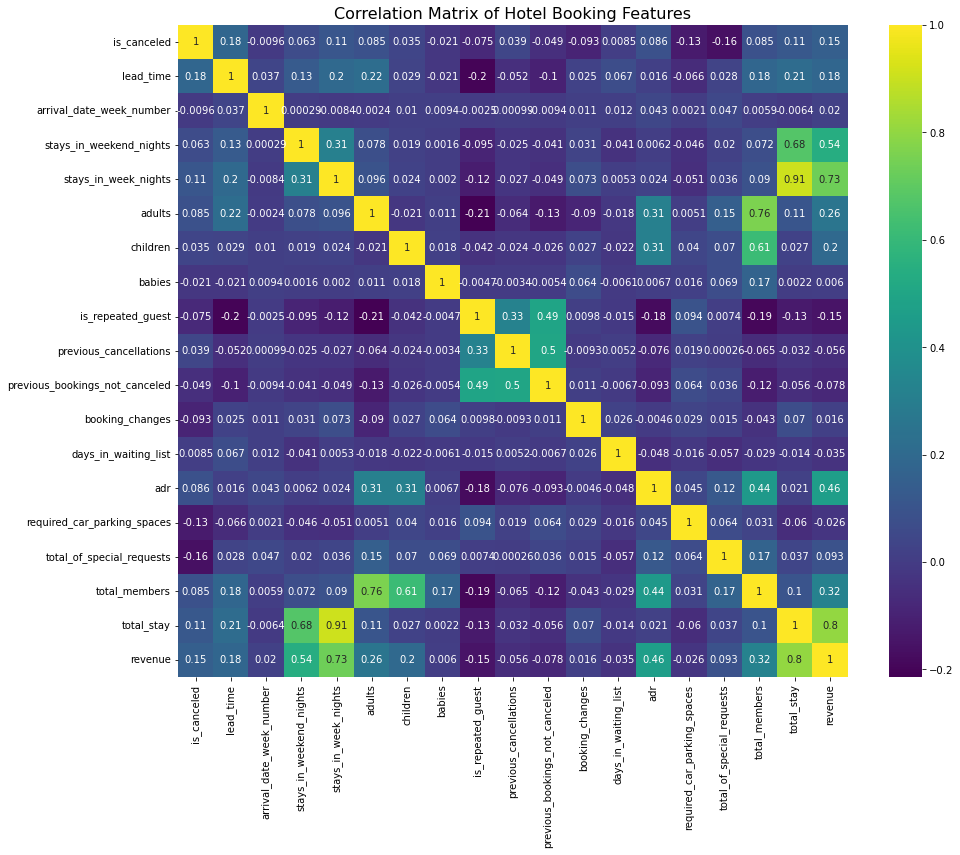

In [23]:
correlations = df.corr()
plt.figure(figsize=(15, 12))
plt.title("Correlation Matrix of Hotel Booking Features", fontsize=16)
sns.heatmap(correlations, annot=True, cmap='viridis')
plt.show()

In [24]:
df.drop(columns=['adults','children','babies','stays_in_week_nights','stays_in_weekend_nights'],inplace=True)

In [25]:
df

,is_canceled,lead_time,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_members,total_stay,revenue
40060,0,0,27,HB,Europe,Offline TA/TO,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,0.00,0,0,1.0,2,0.00
40061,1,1,27,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,76.50,0,1,2.0,4,306.00
40062,1,1,27,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,68.00,0,1,1.0,4,272.00
40063,1,1,27,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,76.50,0,2,2.0,6,459.00
40064,1,1,27,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,76.50,0,1,2.0,2,153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,35,BB,Europe,Offline TA/TO,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,96.14,0,0,2.0,7,672.98
119386,0,1,35,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,225.43,0,2,3.0,7,1578.01
119387,0,1,35,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,157.71,0,4,2.0,7,1103.97
119388,0,1,35,BB,Europe,Online TA,TA/TO,0,0,0,...,No Deposit,Agent,0,Transient,104.40,0,0,2.0,7,730.80
